In [1]:
import os
import numpy as np
import pickle

from pyfiles_for_demos.register_data import json_to_dict
from pyfiles_for_demos.register_data import show_img_and_mask
from pyfiles_for_demos.register_data import dictionary_fuction_for_detectron2
from pyfiles_for_demos.predict import predict_discharge_curve
from pyfiles_for_demos.predict import show_output_img_and_mask
from pyfiles_for_demos.img_rescale import img_rescale
import detectron2
from detectron2.data import DatasetCatalog, MetadataCatalog
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor

** fvcore version of PathManager will be deprecated soon. **
** Please migrate to the version in iopath repo. **
https://github.com/facebookresearch/iopath 

** fvcore version of PathManager will be deprecated soon. **
** Please migrate to the version in iopath repo. **
https://github.com/facebookresearch/iopath 



### 1. Resize and Format all annotations files(.json)

In [2]:
json_directory = "./discharge_curve_json/"
test_directory = "./test_discharge_curve_json/"
img_height = 400
img_width = 600
#dataset_dict, imgs, polygon_list = json_to_dict(json_directory, img_height, img_width)
dataset_dict, imgs, polygon_list = json_to_dict(test_directory, img_height, img_width)

### 2. Visualize Resized Images and Masks

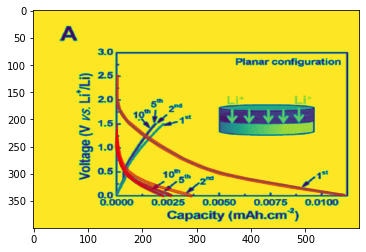

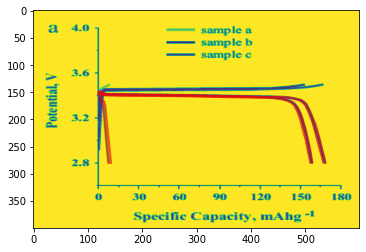

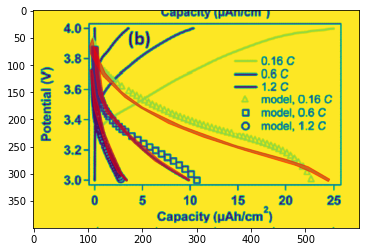

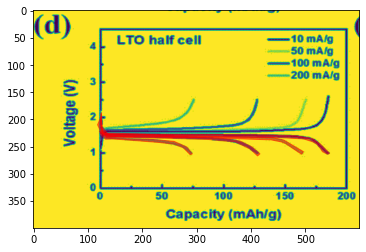

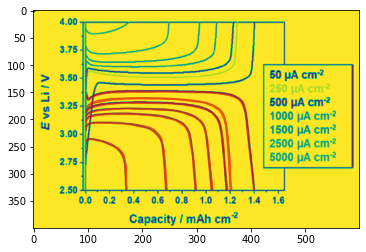

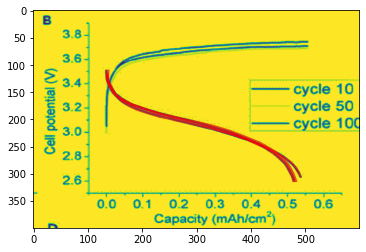

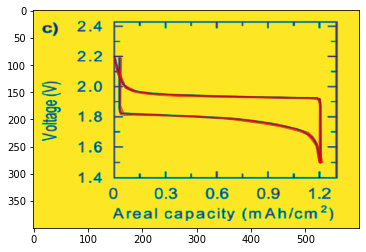

In [3]:
#show_img_and_mask(imgs,polygon_list)
show_img_and_mask(imgs,polygon_list)

### 3. Register Dataset to Detectron2 as "discharge_curve"

In [4]:
DatasetCatalog.register("discharge_curve", lambda: dictionary_fuction_for_detectron2(json_directory, img_height, img_width))
MetadataCatalog.get("discharge_curve").set(thing_classes=["discharge_curve"])

namespace(name='discharge_curve', thing_classes=['discharge_curve'])

In [5]:
DatasetCatalog.register("discharge_curve_test", lambda: dictionary_fuction_for_detectron2(test_directory, img_height, img_width))
MetadataCatalog.get("discharge_curve_test").set(thing_classes=["discharge_curve"])

namespace(name='discharge_curve_test', thing_classes=['discharge_curve'])

### 4. Train the Neural Network with the Registered Dataset with Detectron2

In [10]:
cfg = get_cfg()
# Set outpu directory
cfg.OUTPUT_DIR = "./log"
# Use pretrained RCNN
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
# Use our training dataset
cfg.DATASETS.TRAIN = ("discharge_curve",)
cfg.DATASETS.TEST = ("discharge_curve_test",)
# number of parallel data loading workers
cfg.DATALOADER.NUM_WORKERS = 2
# use pretrained weights
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
# in 1 iteration the model sees 2 images
cfg.SOLVER.IMS_PER_BATCH = 4
# set learning rate
cfg.SOLVER.BASE_LR = 0.00020
# number of iteration
cfg.SOLVER.MAX_ITER = 20
# number of proposals to sample for training
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128
# number of classes
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)

#### Extra settings for cpu only scenario ####
cfg.MODEL.DEVICE = "cpu"
cfg.MODEL.RPN.BBOX_REG_LOSS_TYPE = "smooth_l1"
cfg.MODEL.RPN.BBOX_REG_LOSS_WEIGHT = 1.0
cfg.MODEL.ROI_BOX_HEAD.BBOX_REG_LOSS_TYPE = "smooth_l1"
cfg.MODEL.ROI_BOX_HEAD.BBOX_REG_LOSS_WEIGHT = 1.0

In [7]:
%%time
# Train the Neural Network
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()

[INFO   ] defaults:build_model:436 - Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

[INFO   ] defaults:build_model:436 - Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

[INFO   ] build:filter_images_with_only_crowd_annotations:61 - Removed 0 images with no usable annotations. 27 images left.
[INFO   ] build:filter_images_with_only_crowd_annotations:61 - Removed 0 images with no usable annotations. 27 images left.
[INFO   ] logger:log_first_n:168 - Distribution of instances among all 1 categories:
|   category    | #instances   |
|:-------------:|:-------------|
| discharge_c.. | 105          |
|               |              |
[INFO   ] logger:log_first_n:168 - Distribution of instances among all 1 categories:
|   category    | #instances   |
|:-------------:|:-------------|
| discharge_c.. | 105          |
|               |              |
[INFO   ] dataset_mapper:__init__:83 - [DatasetMapper] Augmentations used in training: [ResizeShortestEdge(short_edge_length=(640, 672, 704, 736, 768, 800), max_size=1333, sample_style='choice'), RandomFlip()]
[INFO   ] dataset_mapper:__init__:83 - [DatasetMapper] Augmentations used in training: [ResizeShortestEdge(s

[INFO   ] dataset_mapper:__init__:83 - [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[INFO   ] dataset_mapper:__init__:83 - [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[INFO   ] common:__init__:88 - Serializing 7 elements to byte tensors and concatenating them all ...
[INFO   ] common:__init__:88 - Serializing 7 elements to byte tensors and concatenating them all ...
[INFO   ] common:__init__:97 - Serialized dataset takes 0.02 MiB
[INFO   ] common:__init__:97 - Serialized dataset takes 0.02 MiB
[WARNING] defaults:test:528 - No evaluator found. Use `DefaultTrainer.test(evaluators=)`, or implement its `build_evaluator` method.
[WARNING] defaults:test:528 - No evaluator found. Use `DefaultTrainer.test(evaluators=)`, or implement its `build_evaluator` method.


CPU times: user 1h 27min 48s, sys: 5min 14s, total: 1h 33min 3s
Wall time: 24min


In [8]:
### Load tensor board to see how the model trains
%load_ext tensorboard
%tensorboard --logdir "./log"

Reusing TensorBoard on port 6009 (pid 6645), started 22:59:54 ago. (Use '!kill 6645' to kill it.)

### 5. Save the Trained Neural Network Configuration as .pkl file
```model_final.pth``` is the neural network and ```config.pkl``` is the configuration file. Be sure to save both files once the nn is trained!

In [11]:
# Update weights in the configuration
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.67   # set the testing threshold for this model
# Save the neural network as .pkl file
filename = './log/config.pkl'
with open(filename, 'wb') as file:
     pickle.dump(cfg, file)

### 6. Test the Neural Network 

original image shape: (1493, 2583) is scaled to new image shape (400, 600)


[INFO   ] checkpoint:load:138 - Loading checkpoint from ./log/model_final.pth
/home/daniu/miniconda3/lib/python3.8/site-packages/detectron2/modeling/roi_heads/fast_rcnn.py:124: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:882.)
  filter_inds = filter_mask.nonzero()


No instance predicted, showing only the image


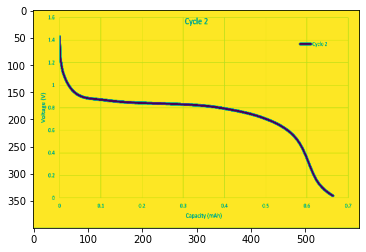

In [14]:
rescaled_img = img_rescale("test_image/"+"Test_bw_1solid.png", 400, 600)
outputs = predict_discharge_curve("./log/config.pkl", rescaled_img)
show_output_img_and_mask("scaled_input_image/scaled_Test_bw_1solid.png", outputs)